In [ ]:
!git clone https://github.com/ImagingYeditepe/Segmentation-of-Teeth-in-Panoramic-X-ray-Image.git

# These codes doesnt includes augmention tech. for now

Cloning into 'Segmentation-of-Teeth-in-Panoramic-X-ray-Image'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (178/178), done.
remote: Total 184 (delta 82), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (184/184), 20.82 MiB | 18.16 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [ ]:
import sys
sys.path.append("/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image")

In [ ]:
%cd /content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image
#!pip install -qr requirements.txt
#You can  use pip install however colab includes all libraries so we dont need them

/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image


In [ ]:
from download_dataset import *
import os
path = "/content/Data"
if os.path.exists(path+'/DentalPanoramicXrays.zip') == False:
  os.mkdir(path)
  download_dataset(path+'/')

In [ ]:
from images_prepare import *
#pre_images(resize_shape,path,include_zip)
X,X_sizes=pre_images((512,512),path,True)

In [ ]:
from masks_prepare import *
#Y=pre_masks(resize_shape=(512,512),path='/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image/Original_Masks')  ORIGINALL MASKS function 
Y=pre_splitted_masks(path='/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image/Custom_Masks') #Custom Splitted MASKS size 512x512


In [ ]:
X=np.float32(X/255)
Y=np.float32(Y/255)

In [ ]:
x_train=X[:105,:,:,:]
y_train=Y[:105,:,:,:]
x_test=X[105:,:,:,:]
y_test=Y[105:,:,:,:]

In [ ]:
import random
import matplotlib.pyplot as plt
random_number=random.randint(0,104)
print(random_number)

56


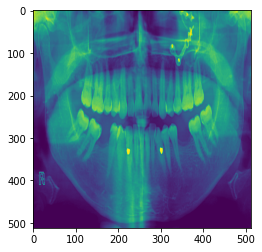

In [ ]:
#Checking data X  and Y matching
plt.imshow(x_train[random_number,:,:,0])

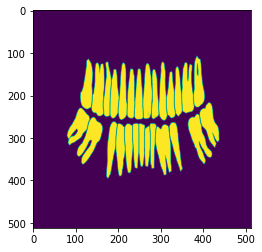

In [ ]:
#Checking data X  and Y matching
plt.imshow(y_train[random_number,:,:,0])

In [ ]:
from model import *
model=UNET(input_shape=(512,512,1),last_activation='sigmoid')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 512, 512, 32) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 32) 9248        dropout[0][0]                    
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Your choice batch and epoch 
model.fit(x_train,y_train,batch_size=8,epochs=150,verbose=1)

Epoch 1/150
14/14 [==============================] - 64s 1s/step - loss: 0.4943 - accuracy: 0.7136
Epoch 2/150
14/14 [==============================] - 13s 928ms/step - loss: 0.2803 - accuracy: 0.8325
Epoch 3/150
14/14 [==============================] - 13s 942ms/step - loss: 0.2458 - accuracy: 0.8438
Epoch 4/150
14/14 [==============================] - 13s 948ms/step - loss: 0.1788 - accuracy: 0.8729
Epoch 5/150
14/14 [==============================] - 13s 956ms/step - loss: 0.1576 - accuracy: 0.8777
Epoch 6/150
14/14 [==============================] - 14s 969ms/step - loss: 0.1399 - accuracy: 0.8838
Epoch 7/150
14/14 [==============================] - 14s 982ms/step - loss: 0.1326 - accuracy: 0.8908
Epoch 8/150
14/14 [==============================] - 14s 992ms/step - loss: 0.1304 - accuracy: 0.8870
Epoch 9/150
14/14 [==============================] - 14s 979ms/step - loss: 0.1293 - accuracy: 0.8869
Epoch 10/150
14/14 [==============================] - 14s 972ms/step - loss: 0.1164 -

In [61]:
predict_img=model.predict(x_test)
##model.save(path)
predict=predict_img[0,:,:,0] 

In [ ]:
plt.imsave("/content/sd.png",predict)

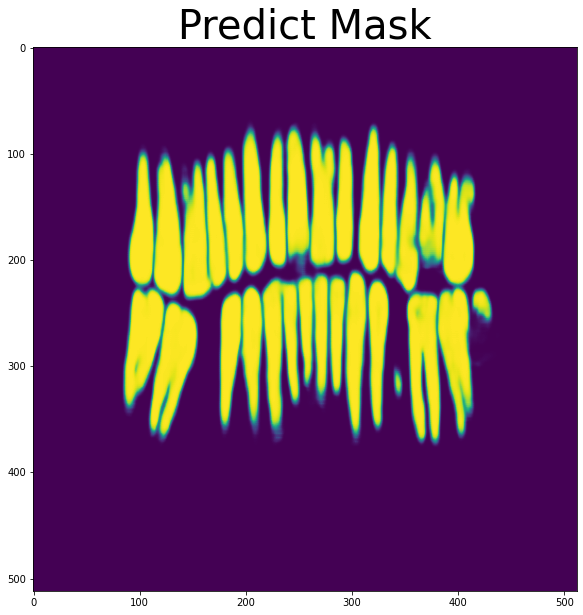

In [ ]:

plt.figure(figsize = (20,10))
plt.title("Predict Mask",fontsize = 40)
plt.imshow(predict)

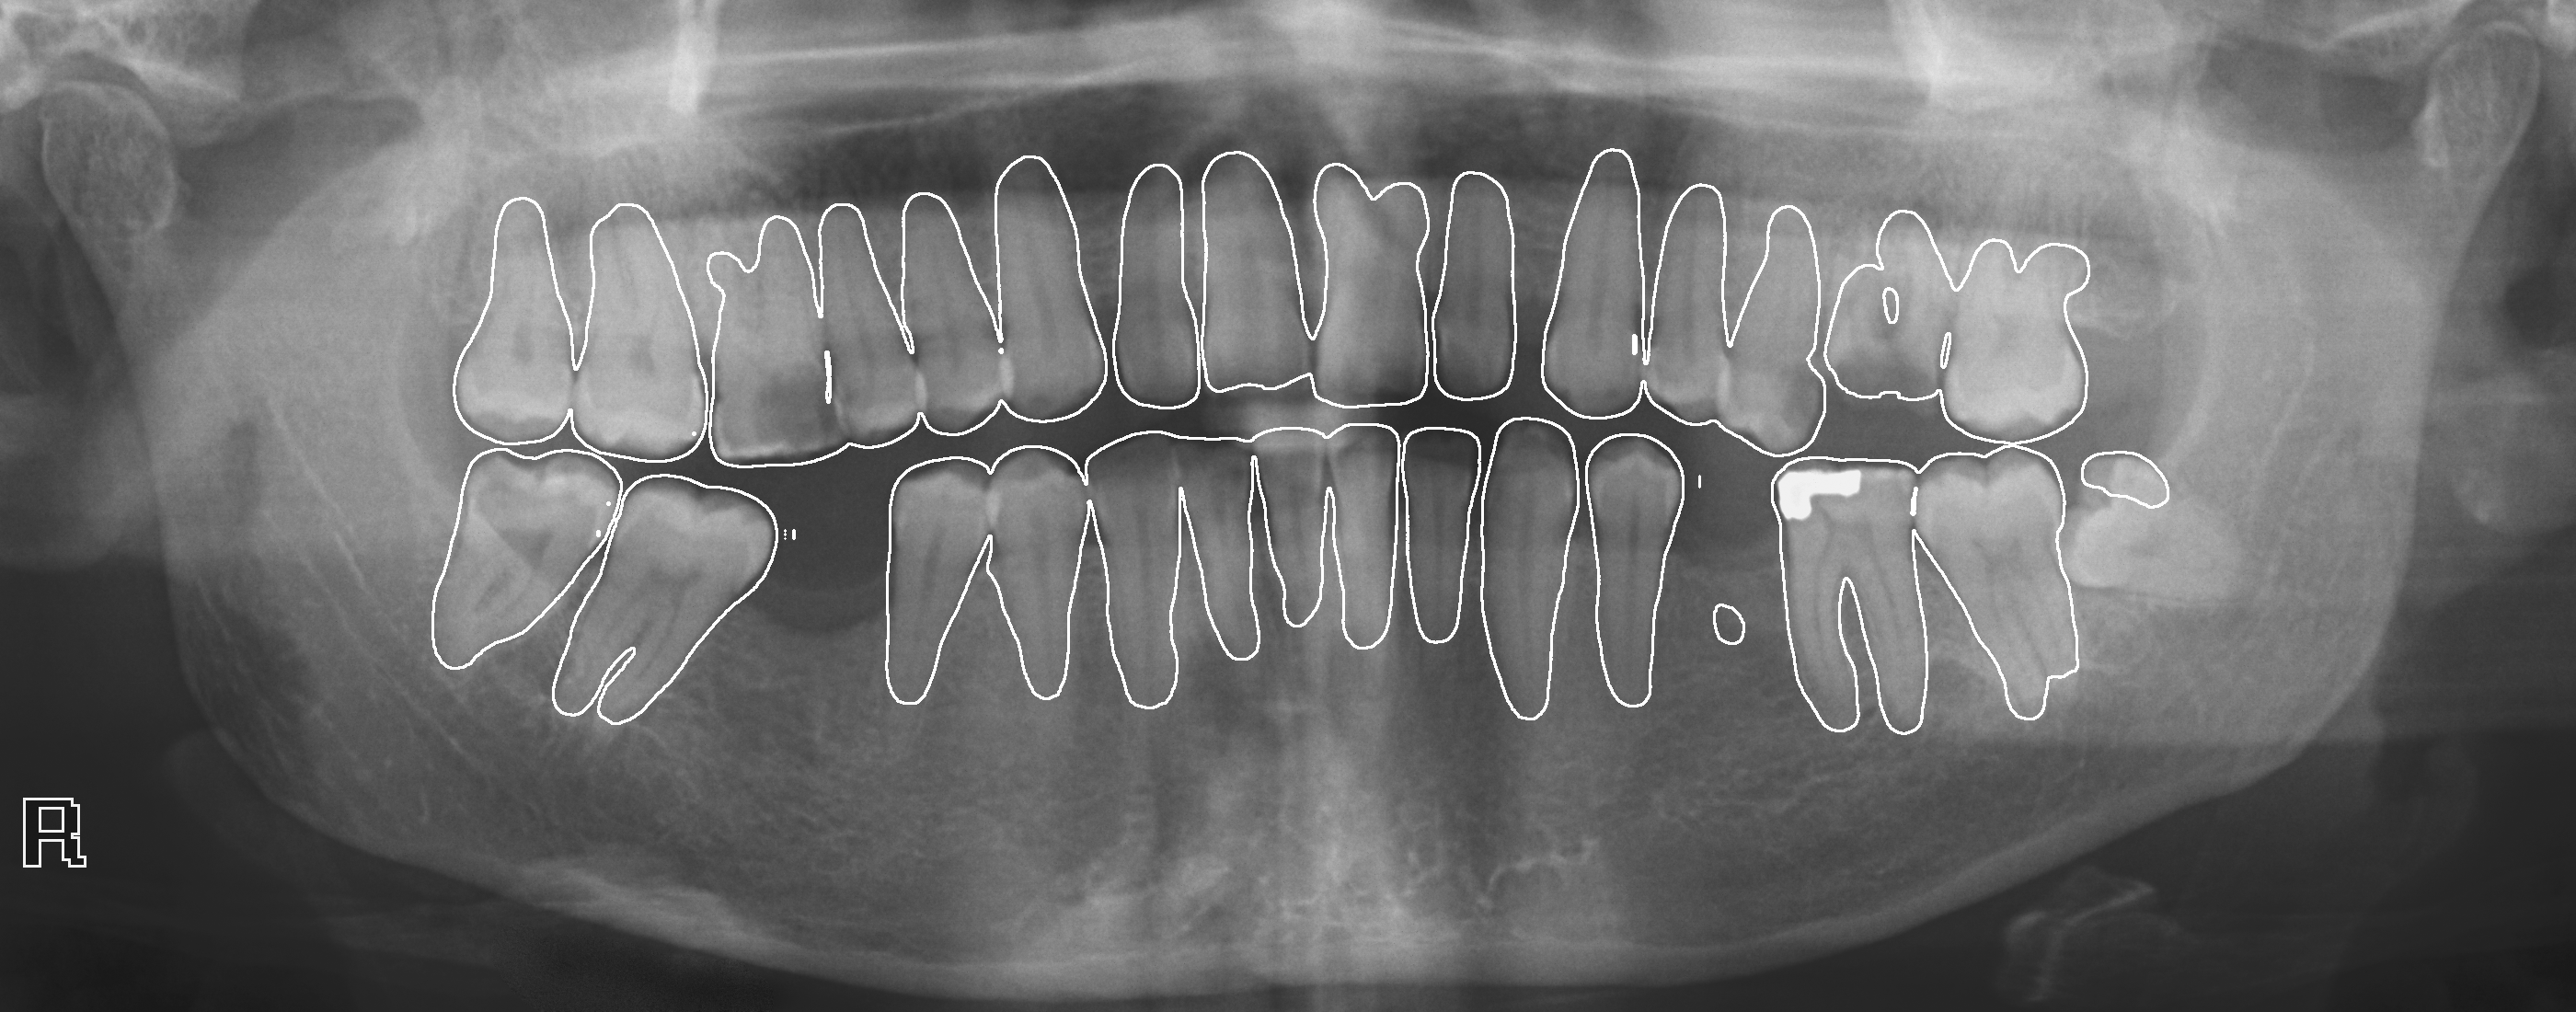

In [62]:
from google.colab.patches import cv2_imshow
import cv2
from CCA_Analysis import *


##Plotting - RESULT Example
img=cv2.imread("/content/drive/MyDrive/Data/Images/106.png")#original img 106.png 

predict1 = cv2.resize(predict, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

mask=np.uint8(predict1*255)# 
_, mask = cv2.threshold(mask, thresh=255/2, maxval=255, type=cv2.THRESH_BINARY)
cnts,hieararch=cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img[:,:,0], cnts, -1, (255, 0, 0) , 2)
img = cv2.UMat.get(img)
cv2_imshow(img)